In [160]:
!pip install celluloid

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

In [148]:
df_multy = pd.read_csv("multi_tread.csv")
df_multy.head()

,step,x1,x2,y,f1,f2,Ax,Ay,Bx,By,C,time_s
0,0,-0.167225,0.167225,0.207521,2.032683,2.032683,-0.353,0.300000,0.353,0.300000,1.178097,0.365070
1,1,-0.167225,0.167225,0.207521,2.032683,2.032683,-0.353,0.299669,0.353,0.299669,1.178097,0.466511
2,2,-0.167781,0.167781,0.207075,2.034377,2.034377,-0.353,0.299007,0.353,0.299007,1.178097,0.422125
3,3,-0.168891,0.168891,0.206184,2.037775,2.037775,-0.353,0.298016,0.353,0.298016,1.178097,0.389102
4,4,-0.170548,0.170548,0.204858,2.042877,2.042877,-0.353,0.296700,0.353,0.296700,1.178097,0.423105


In [149]:
def add_time_sum_col(df):
    time_s = np.array(df.time_s)
    time_sum = []
    current_sum=0
    for k in time_s:
        time_sum.append(k+current_sum)
        current_sum+=k
    df["time_sum"] = time_sum
    return df

In [150]:
df_multy = add_time_sum_col(df_multy)

In [152]:
df_single = pd.read_csv("single_tread.csv")
df_single.head()

,step,x1,x2,y,f1,f2,Ax,Ay,Bx,By,C,time_s
0,0,-0.167225,0.167225,0.207521,2.032683,2.032683,-0.353,0.300000,0.353,0.300000,1.178097,0.380227
1,1,-0.167225,0.167225,0.207521,2.032683,2.032683,-0.353,0.299669,0.353,0.299669,1.178097,0.401466
2,2,-0.167781,0.167781,0.207075,2.034377,2.034377,-0.353,0.299007,0.353,0.299007,1.178097,0.431813
3,3,-0.168891,0.168891,0.206184,2.037775,2.037775,-0.353,0.298016,0.353,0.298016,1.178097,0.421639
4,4,-0.170548,0.170548,0.204858,2.042877,2.042877,-0.353,0.296700,0.353,0.296700,1.178097,0.374445


In [153]:
df_single = add_time_sum_col(df_single)

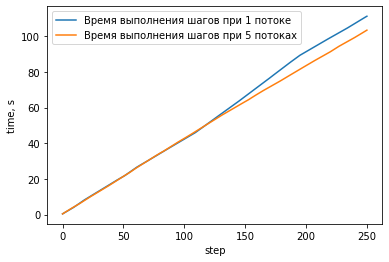

In [171]:
sns.lineplot(data=df_single, x="step", y="time_sum", label=' при 1 потоке').set(ylabel='time, s') 
sns.lineplot(data=df_multy, x="step", y="time_sum", label='Время выполнения шагов при 5 потоках').set(ylabel='time, s') 
plt.legend()
plt.show()

# Ускорение

In [155]:
df_multy['speed_up'] = df_single['time_sum'] / df_multy['time_sum']

In [156]:
df_multy

,step,x1,x2,y,f1,f2,Ax,Ay,Bx,By,C,time_s,time_sum,speed_up
0,0,-0.167225,0.167225,0.207521,2.032683,2.032683,-0.353,0.300000,0.353,0.300000,1.178097,0.365070,0.365070,1.041518
1,1,-0.167225,0.167225,0.207521,2.032683,2.032683,-0.353,0.299669,0.353,0.299669,1.178097,0.466511,0.831581,0.940008
2,2,-0.167781,0.167781,0.207075,2.034377,2.034377,-0.353,0.299007,0.353,0.299007,1.178097,0.422125,1.253706,0.967935
3,3,-0.168891,0.168891,0.206184,2.037775,2.037775,-0.353,0.298016,0.353,0.298016,1.178097,0.389102,1.642808,0.995335
4,4,-0.170548,0.170548,0.204858,2.042877,2.042877,-0.353,0.296700,0.353,0.296700,1.178097,0.423105,2.065913,0.972737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,-0.190919,0.190919,0.188772,2.109048,2.109048,-0.353,0.292804,0.353,0.292804,1.178097,0.428060,101.799381,1.077168
247,247,-0.179169,0.179169,0.198002,2.070080,2.070080,-0.353,0.299829,0.353,0.299829,1.178097,0.419804,102.219185,1.076711
248,248,-0.167513,0.167513,0.207290,2.033560,2.033560,-0.353,0.306570,0.353,0.306570,1.178097,0.411892,102.631077,1.076276
249,249,-0.156058,0.156058,0.216543,1.999559,1.999559,-0.353,0.312981,0.353,0.312981,1.178097,0.415043,103.046120,1.076039


[Text(0.5, 1.0, 'Ускорение'), Text(0, 0.5, 'speed up')]

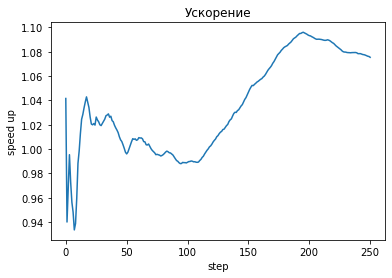

In [163]:
sns.lineplot(data=df_multy, x="step", y="speed_up").set(title='Ускорение', ylabel='speed up') 

# Мультик

MovieWriter ffmpeg unavailable; using Pillow instead.


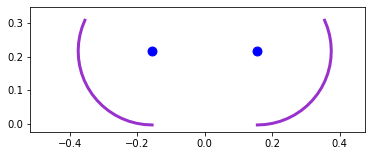

In [162]:
camera = Camera(plt.figure())
for step in range(250):
    ax = plt.gca().set_aspect('equal')
    plt.scatter(x=[df.x1[step], df.x2[step]], y=[df.y[step], df.y[step]], c='b', s=80)
    radius = ((df.x1[step] - df.Ax[step])**2 + (df.y[step] - df.Ay[step])**2) ** 0.5
    
    arc_angles = np.linspace(-np.pi/2-df.f1[step], -np.pi/2, 20)
    arc_xs = radius * np.cos(arc_angles) + df.x1[step]
    arc_ys = radius * np.sin(arc_angles) + df.y[step]
    plt.plot(arc_xs, arc_ys, color = 'darkorchid', lw = 3)
    
    arc_angles = np.linspace(-np.pi/2, -np.pi/2 + df.f2[step], 20)
    arc_xs = radius * np.cos(arc_angles) + df.x2[step]
    arc_ys = radius * np.sin(arc_angles) + df.y[step]
    plt.plot(arc_xs, arc_ys, color = 'darkorchid', lw = 3)
    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.gif')